In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import sys
sys.path.append("/home/jovyan/work")

from src.features.build_features import add_features_min_average
from src.visualization.visualize import eval_metrics

# Load data
train_data = pd.read_csv('../../data/raw/train.csv')
test_data = pd.read_csv('../../data/raw/test.csv')

# remove Id columns
train_data_x = train_data.copy()
train_data_x = train_data_x.drop(['Id_old', 'Id'], axis=1)
train_data_target = train_data_x.pop('TARGET_5Yrs')

test_data_x = test_data.drop(['Id_old', 'Id'], axis=1)

# Scale data
scaler = MinMaxScaler()

df_train_scaled = pd.DataFrame(scaler.fit_transform(train_data_x), columns=train_data_x.columns)
df_test_scaled = pd.DataFrame(scaler.fit_transform(test_data_x), columns=test_data_x.columns)

In [7]:
df_train_scaled.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.671756,0.301834,0.209581,0.210938,0.199288,0.531590,0.428571,0.435897,0.506633,0.246914,0.261261,0.468716,0.400000,0.166667,0.224359,0.250000,0.305556,0.491848,0.288462
1,0.633588,0.266573,0.290419,0.304688,0.252669,0.736383,0.285714,0.269231,0.608624,0.296296,0.324324,0.445115,0.654545,0.324074,0.403846,0.054688,0.138889,0.502717,0.250000
2,0.709924,0.228491,0.110778,0.125000,0.131673,0.468410,0.535714,0.551282,0.603648,0.049383,0.054054,0.488474,0.109091,0.148148,0.134615,0.062500,0.111111,0.491848,0.096154
3,0.541985,0.228491,0.221557,0.250000,0.209964,0.679739,0.500000,0.500000,0.515755,0.111111,0.135135,0.440176,0.145455,0.166667,0.173077,0.140625,0.111111,0.489130,0.346154
4,0.541985,0.210155,0.086826,0.109375,0.092527,0.642702,0.571429,0.576923,0.432836,0.024691,0.045045,0.369374,0.436364,0.231481,0.294872,0.031250,0.111111,0.502717,0.115385


In [8]:
fe_data = add_features_min_average(train_data_x.copy(), scaler)
fe_data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,STL,BLK,TOV,PTS_pm,FTM_pm,REB_pm,AST_pm,STL_pm,BLK_pm,TOV_pm
0,0.671756,0.301834,0.209581,0.210938,0.199288,0.531590,0.428571,0.435897,0.506633,0.246914,...,0.305556,0.491848,0.288462,0.247036,0.281568,0.213341,0.262120,0.310406,0.776745,0.231443
1,0.633588,0.266573,0.290419,0.304688,0.252669,0.736383,0.285714,0.269231,0.608624,0.296296,...,0.138889,0.502717,0.250000,0.462012,0.376630,0.444481,0.063914,0.157274,0.782420,0.224782
2,0.709924,0.228491,0.110778,0.125000,0.131673,0.468410,0.535714,0.551282,0.603648,0.049383,...,0.111111,0.491848,0.096154,0.132786,0.071645,0.164824,0.083371,0.143605,0.777404,0.090180
3,0.541985,0.228491,0.221557,0.250000,0.209964,0.679739,0.500000,0.500000,0.515755,0.111111,...,0.111111,0.489130,0.346154,0.391989,0.161201,0.214429,0.187584,0.143605,0.775864,0.369434
4,0.541985,0.210155,0.086826,0.109375,0.092527,0.642702,0.571429,0.576923,0.432836,0.024691,...,0.111111,0.502717,0.115385,0.095672,0.038439,0.401100,0.044730,0.154093,0.784240,0.122643


In [9]:
col_sel = ['GP', 'MIN', 'PTS_pm', 'FTM_pm', 'REB_pm', 'AST_pm', 'STL_pm', 'BLK_pm', 'TOV_pm']
fe_data = fe_data[col_sel]

print(fe_data.shape)
fe_data.head()

(8000, 9)


,GP,MIN,PTS_pm,FTM_pm,REB_pm,AST_pm,STL_pm,BLK_pm,TOV_pm
0,0.671756,0.301834,0.247036,0.281568,0.213341,0.262120,0.310406,0.776745,0.231443
1,0.633588,0.266573,0.462012,0.376630,0.444481,0.063914,0.157274,0.782420,0.224782
2,0.709924,0.228491,0.132786,0.071645,0.164824,0.083371,0.143605,0.777404,0.090180
3,0.541985,0.228491,0.391989,0.161201,0.214429,0.187584,0.143605,0.775864,0.369434
4,0.541985,0.210155,0.095672,0.038439,0.401100,0.044730,0.154093,0.784240,0.122643


In [10]:
fe_test = add_features_min_average(test_data_x.copy(), scaler)

print(fe_test.shape)
fe_test.head()

(3799, 26)


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,STL,BLK,TOV,PTS_pm,FTM_pm,REB_pm,AST_pm,STL_pm,BLK_pm,TOV_pm
0,0.416667,0.083981,0.102167,0.099237,0.114173,0.375758,0.423077,0.428571,0.405188,0.089744,...,0.074074,0.337900,0.137255,0.429903,0.316239,0.225346,0.107072,0.173626,0.588405,0.433180
1,0.308333,0.242613,0.291022,0.259542,0.287402,0.422222,0.615385,0.628571,0.653846,0.230769,...,0.222222,0.324201,0.333333,0.549753,0.383420,0.070915,0.441743,0.245596,0.560190,0.462240
2,0.633333,0.469673,0.328173,0.351145,0.385827,0.414141,0.576923,0.657143,0.740608,0.230769,...,0.481481,0.337900,0.372549,0.277896,0.218289,0.148806,0.179638,0.302950,0.567764,0.276184
3,0.666667,0.637636,0.560372,0.496183,0.594488,0.359596,0.576923,0.642857,0.460644,0.576923,...,0.333333,0.328767,0.686275,0.402745,0.413870,0.119239,0.223427,0.159060,0.562105,0.393136
4,0.433333,0.133748,0.123839,0.099237,0.125984,0.301010,0.576923,0.628571,0.686047,0.141026,...,0.185185,0.305936,0.156863,0.347699,0.367660,0.064475,0.297061,0.321138,0.532358,0.353141


ROC_AUC Score: 0.66
-----------
Confusion Matrix with thresthold of 0.5:
TN: 8, FP: 249
FN: 4, TP: 1339
1588 out of 1600 or 99% of players are predicted to be 5+ Yrs
-----------
Recall: 0.997
Accuracy: 0.8419
Balanced Accuracy: 0.5141
F1: 0.9137
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.660


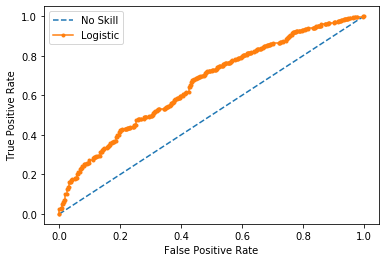

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

X_train, X_val, y_train, y_val = train_test_split(fe_data, train_data_target, test_size=0.2, random_state=8)

rfclf = RandomForestClassifier()
rfclf = CalibratedClassifierCV(base_estimator=rfclf, cv=5)
rfclf = rfclf.fit(X_train, y_train)
y_pred = rfclf.predict_proba(X_val)[:,1]
eval_metrics(y_pred, y_val, praba_threshold=0.5)

In [16]:
fe_data.head()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,STL,BLK,TOV,PTS_pm,FTM_pm,REB_pm,AST_pm,STL_pm,BLK_pm,TOV_pm
0,1,0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,...,0.2,0.3,0.8,0.439560,0.076923,0.186813,0.043956,0.021978,0.032967,0.087912
1,8194,1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,...,0.6,0.0,1.8,0.523316,0.093264,0.077720,0.181347,0.031088,0.000000,0.093264
2,3,2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,...,1.3,0.3,2.0,0.333333,0.053097,0.132743,0.073746,0.038348,0.008850,0.058997
3,8196,3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,...,0.9,0.1,3.6,0.420582,0.100671,0.111857,0.091723,0.020134,0.002237,0.080537
4,8197,4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,...,0.5,-0.4,0.9,0.382114,0.089431,0.073171,0.121951,0.040650,-0.032520,0.073171


In [19]:
submission = rfclf.predict_proba(fe_data)[:,1]
submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
submission.to_csv("../../data/submission/0211_fe_rf.csv", index=False)

ValueError: X has 26 features, but DecisionTreeClassifier is expecting 29 features as input.